In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [46]:
#-------Frame error verdiği için dosya okurken low_memory hata çözümü için bu şekilde kullandım.
#-------Survey Data Frame oluşturup dosya yükleme
survey = pd.read_csv('kaggle_survey_2020_responses.csv',skiprows=[1],sep=',',error_bad_lines=False, index_col=False, dtype='unicode')
survey
#-------İlk sütunu silme
survey = survey.drop(survey.columns[[0]], axis=1)
survey
#-------Rename for Q1,Q2,Q3,Q4,Q5,Q6
survey = survey.rename(columns = {'Q1': 'Age', 'Q2': 'Gender','Q3': 'Country','Q4': 'Education','Q5': 'Occupation','Q6': 'Coding_Experience'}, inplace = False)
survey
#-------Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları silme ve kaç satır silindi?
print("Number of null values in Education  : " + str(survey.iloc[:, 3].isnull().sum()))
print("Number of null values in Occupation : " + str(survey.iloc[:, 4].isnull().sum()))
print("Number of null values in Coding Experience : " + str(survey.iloc[:, 5].isnull().sum()))


print("Before deleting rows with NaN content")
print("  Rows - Columns\n" , survey.shape)
first_rows = len(survey)


survey.dropna(subset = ["Education","Occupation","Coding_Experience"], inplace=True)
survey.reset_index(drop=True, inplace=True)
print("After deleting rows with NaN content")
print("  Rows - Columns\n" , survey.shape)
updated_rows = len(survey)

print("Number of Deleted Rows : ", (first_rows-updated_rows))





Number of null values in Education  : 467
Number of null values in Occupation : 759
Number of null values in Coding Experience : 916
Before deleting rows with NaN content
  Rows - Columns
 (20036, 354)
After deleting rows with NaN content
  Rows - Columns
 (19120, 354)
Number of Deleted Rows :  916


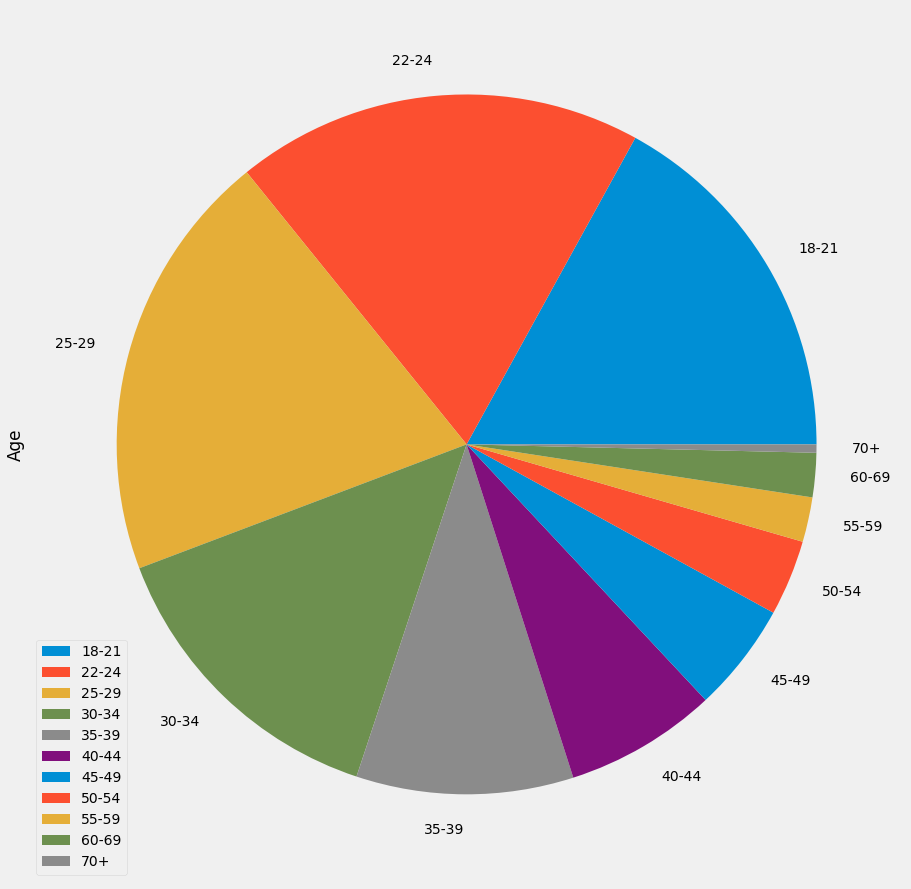

,Age
18-21,3249
22-24,3599
25-29,3813
30-34,2705
35-39,1917
40-44,1345
45-49,965
50-54,669
55-59,395
60-69,390


In [47]:
age_df = survey.Age.unique() # Yaş sınıfları indirgendi.
age_df_count = survey['Age'].value_counts().sort_index() # Yaş sınıflarına ait değerler sınıflara karşılık gelecek şekilde sıralandı
age_df = np.sort(age_df) # Yaş sınıfları küçükten büyüğe sıralandı.


style.use("fivethirtyeight") 

survey_age = pd.DataFrame({"Age": age_df_count},index= age_df) # Pasta grafiği için frame atandı.
plot_age = survey_age.plot.pie(y="Age", figsize=(15,15)) 
plt.show()

age_df_count.to_frame()

The number of respondents from Turkey according to their education level :
 Bachelor’s degree                                                    129
Doctoral degree                                                       50
I prefer not to answer                                                 8
Master’s degree                                                      111
No formal education past high school                                   3
Professional degree                                                    6
Some college/university study without earning a bachelor’s degree     15
Name: Education, dtype: int64

----------------------------------------------------------------------------------

GRAPH OF THE LIST


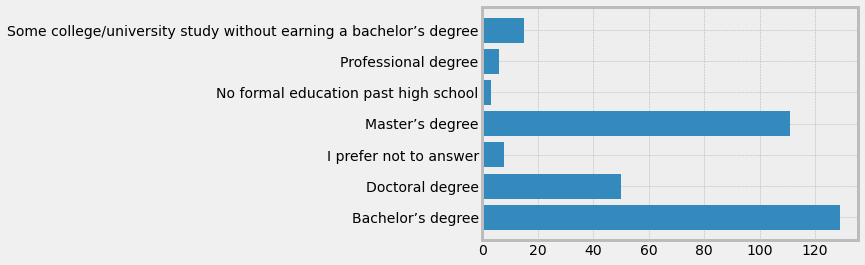

,Age,Gender,Country,Education,Occupation,Coding_Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
144,18-21,Man,Turkey,Some college/university study without earning ...,Student,I have never written code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,18-21,Man,Turkey,Bachelor’s degree,Data Scientist,1-2 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,18-21,Woman,Turkey,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,40-44,Man,Turkey,I prefer not to answer,Other,I have never written code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,18-21,Man,Turkey,Bachelor’s degree,Student,1-2 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18662,18-21,Man,Turkey,Some college/university study without earning ...,Product/Project Manager,3-5 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18726,40-44,Man,Turkey,Doctoral degree,Currently not employed,3-5 years,Python,NaN,SQL,NaN,...,NaN,Comet.ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18845,35-39,Man,Turkey,Master’s degree,Other,3-5 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19020,25-29,Man,Turkey,Master’s degree,Business Analyst,1-2 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
survey_for_Turkey = survey.loc[survey['Country'] == "Turkey"] # Türkiye'den ankete katılanlar tablolandı.

Education_df = survey_for_Turkey.Education.unique()
Education_df = np.sort(Education_df)
Education_df_count = survey_for_Turkey['Education'].value_counts().sort_index() # Türkiye tabosunda eğitim seviyeleri ve sayıları gruplandı. ve 

# Türkiye'den ankete katılanların eğitim seviyeleri ve sayıları listelendi.
print("The number of respondents from Turkey according to their education level :"+"\n",Education_df_count)

print("\n----------------------------------------------------------------------------------")

#Türkiye'den ankete katılanların eğitim seviyeleri ve sayıları lifecycle grafiğinde gösterildi.
print("\nGRAPH OF THE LIST")
style.use("bmh")

fig, ax = plt.subplots()
ax.barh(Education_df, Education_df_count)
plt.show()

survey_for_Turkey


In [49]:
pd.set_option('display.max_rows',20)
age_occupation = survey[["Age","Occupation"]]
age_comp = age_occupation.value_counts().sort_index()

# Karşılaştırma yapıldı ve daha sonra max değer ve ait olduğu meslek yazdırıldı. Tablo için to_frame kullanıldı.
max_occ = age_comp.loc[age_comp.groupby(level=0).idxmax()].to_frame() 

# Her bir yaş aralığı için en çok yapılan meslek isminin (```Occupation```) listesi
max_occ



,,0
Age,Occupation,
18-21,Student,2510
22-24,Student,1465
25-29,Student,669
30-34,Data Scientist,536
35-39,Data Scientist,356
40-44,Data Scientist,230
45-49,Other,143
50-54,Other,109
55-59,Other,81


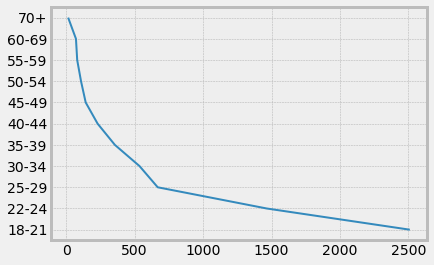

In [50]:
# Max çalışana ait sayı ve yaş grafiği
plt.plot(max_occ.values,np.sort(age_occupation.Age.unique()))
plt.show()

In [51]:
pl_array =np.array(["Python","R","SQL","C","C++","Java","Javascript","Julia","Swift","Bash","MATLAB","None","Other"])
arr = np.array(13)
Q7_Pl = survey.filter(regex='^Q7', axis=1)
print("\nHer bir programlama dili kaç anket katılımcısı tarafından kullanılıyor\n")
Q7_Pl=Q7_Pl.rename(columns={'Q7_Part_1':pl_array[0],'Q7_Part_2':pl_array[1],'Q7_Part_3':pl_array[2],'Q7_Part_4':pl_array[3],
                           'Q7_Part_5':pl_array[4],'Q7_Part_6':pl_array[5],'Q7_Part_7':pl_array[6],'Q7_Part_8':pl_array[7],
                           'Q7_Part_9':pl_array[8],'Q7_Part_10':pl_array[9],'Q7_Part_11':pl_array[10],
                            'Q7_Part_12':pl_array[11],'Q7_OTHER':pl_array[12]})
pl_pot_data=Q7_Pl.count()
pl_pot_data.sort_values(ascending=False).to_frame()


Her bir programlama dili kaç anket katılımcısı tarafından kullanılıyor



,0
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945
Bash,1776


In [52]:
print("\nHer bir programlama dili kaç ```Data Scientist``` tarafından kullanılıyor\n")
Data_Scientist_frame = survey.loc[survey['Occupation'] == "Data Scientist"]
Data_Scientist_frame_wPL = Data_Scientist_frame.filter(regex='^Q7', axis=1)
Data_Scientist_frame_wPL=Data_Scientist_frame_wPL.rename(columns={'Q7_Part_1':pl_array[0],'Q7_Part_2':pl_array[1],'Q7_Part_3':pl_array[2],'Q7_Part_4':pl_array[3],
                           'Q7_Part_5':pl_array[4],'Q7_Part_6':pl_array[5],'Q7_Part_7':pl_array[6],'Q7_Part_8':pl_array[7],
                           'Q7_Part_9':pl_array[8],'Q7_Part_10':pl_array[9],'Q7_Part_11':pl_array[10],
                            'Q7_Part_12':pl_array[11],'Q7_OTHER':pl_array[12]})
Ds_plot_data=Data_Scientist_frame_wPL.count()
Ds_plot_data.sort_values(ascending=False).to_frame()


Her bir programlama dili kaç ```Data Scientist``` tarafından kullanılıyor



,0
Python,2453
SQL,1473
R,975
Bash,405
C++,323
Java,305
Javascript,290
C,247
Other,245
MATLAB,242


Text(0.5, 1.0, 'Number of Data Scientist users of programming languages')

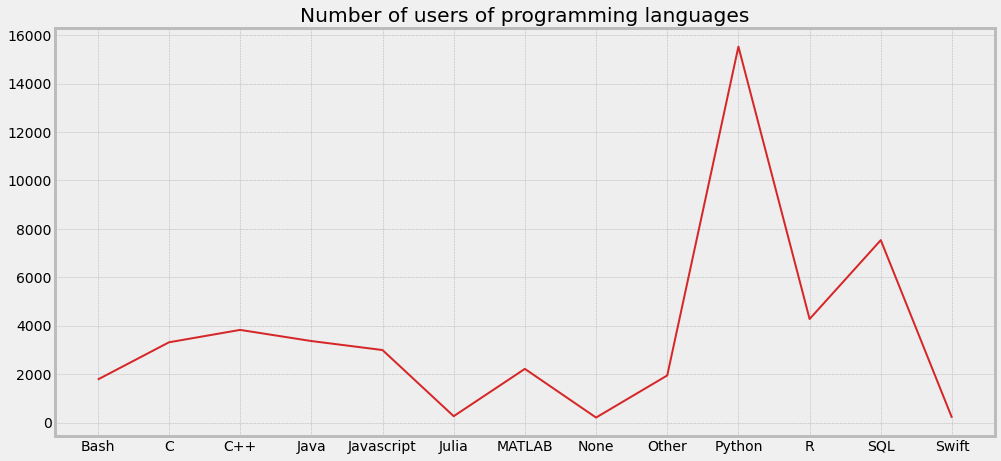

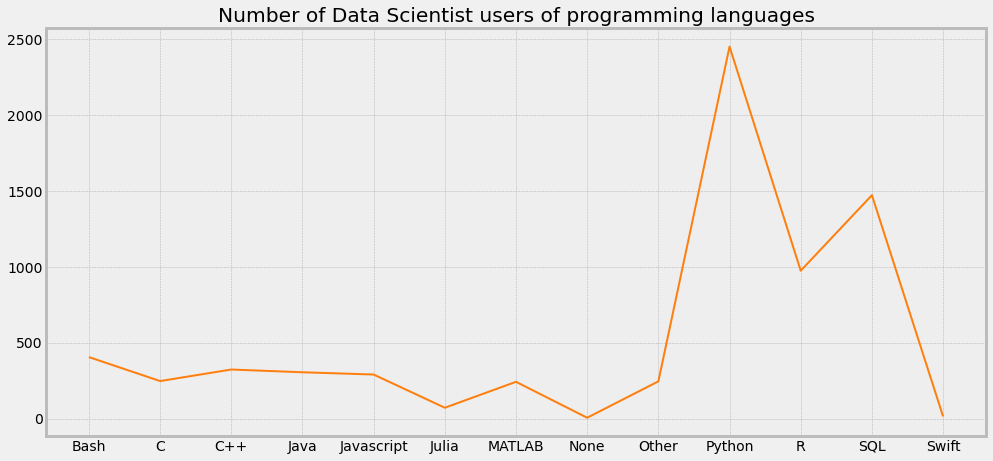

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(pl_pot_data.sort_index().index, pl_pot_data.sort_index().values, 'tab:red')
ax.set_title('Number of users of programming languages')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(Ds_plot_data.sort_index().index, Ds_plot_data.sort_index().values, 'tab:orange')
ax.set_title('Number of Data Scientist users of programming languages')



<AxesSubplot:xlabel='Coding_Experience'>

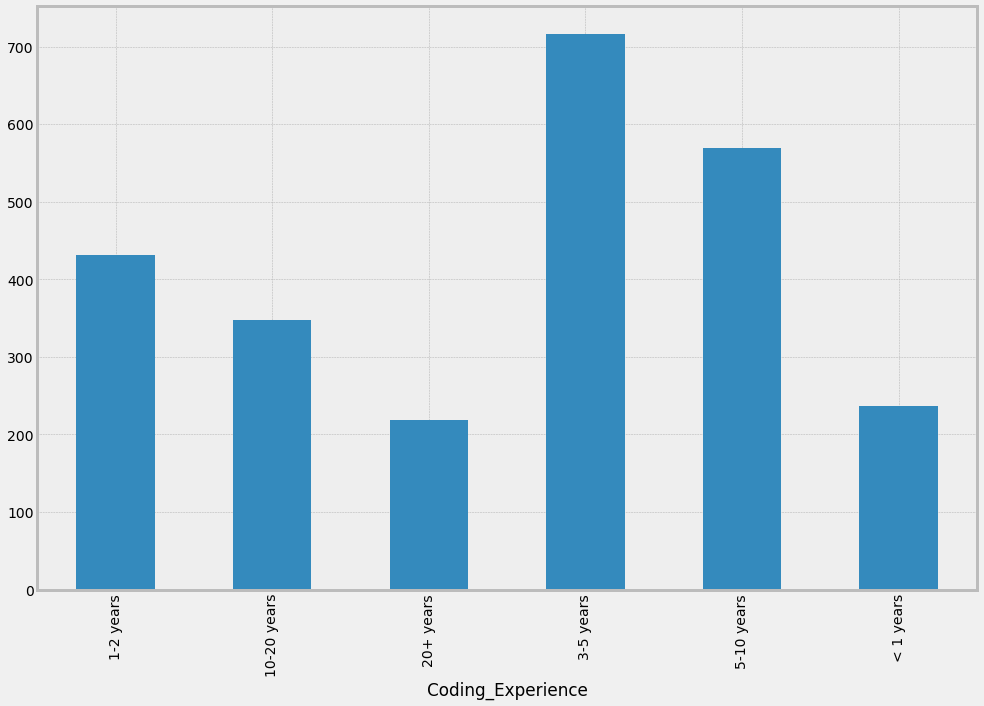

In [54]:
DataScientist_frame_for6 = survey.loc[survey['Occupation'] == "Data Scientist"]
plt.figure()
Data_Scientist_frame_CodeExp_wML = DataScientist_frame_for6.groupby(['Q15', 'Coding_Experience'])['Q15'].count().unstack('Coding_Experience').fillna(0)
Sum_ofdata = Data_Scientist_frame_CodeExp_wML.sum()
ax_Sum_ofdata = Sum_ofdata.plot.bar(figsize=(15,10),stacked=False)
ax_Sum_ofdata

<AxesSubplot:xlabel='Coding_Experience'>

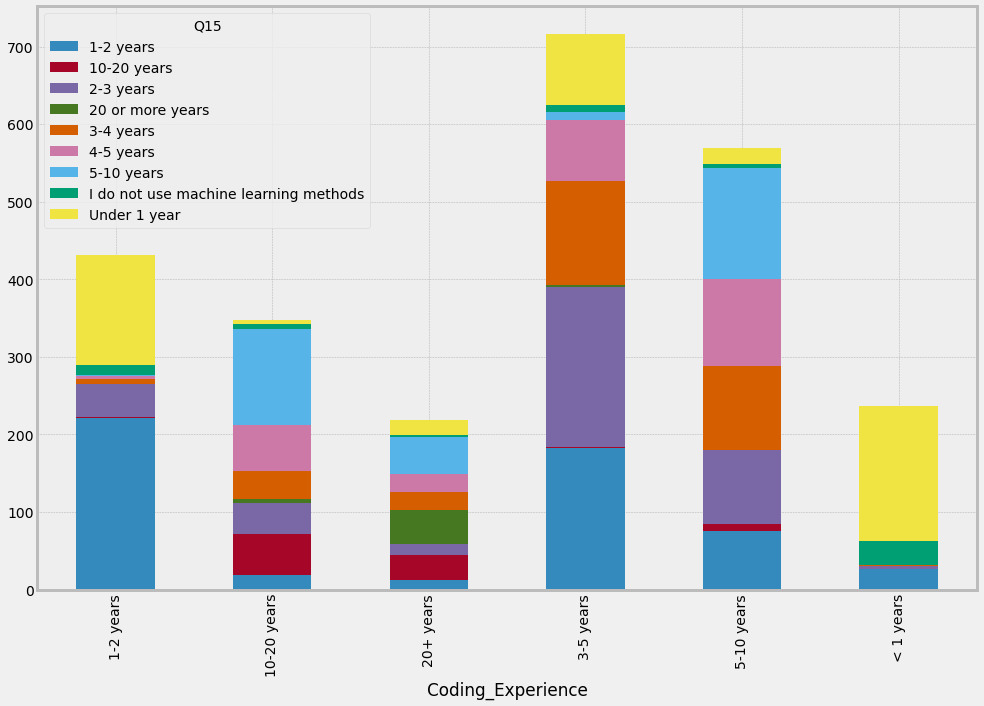

In [55]:

Data_Scientist_frame_CodeExp_wML2 = DataScientist_frame_for6.groupby(['Coding_Experience', 'Q15'])['Coding_Experience'].count().unstack('Q15').fillna(0)
ax_Data_Scientist_frame_CodeExp_wML = Data_Scientist_frame_CodeExp_wML2.plot.bar(figsize=(15,10),stacked=True)
ax_Data_Scientist_frame_CodeExp_wML
# Metod süreleride verilerek, Yığılımlı grafik olarak gösterildi. 

In [56]:
Data_Scientist_frame_CodeExp_wML

Coding_Experience,1-2 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years
Q15,,,,,,
1-2 years,221.0,19.0,12.0,183.0,76.0,27.0
10-20 years,1.0,53.0,33.0,1.0,9.0,0.0
2-3 years,43.0,39.0,14.0,206.0,95.0,3.0
20 or more years,0.0,6.0,44.0,2.0,0.0,0.0
3-4 years,7.0,36.0,23.0,135.0,108.0,1.0
4-5 years,3.0,59.0,23.0,78.0,112.0,0.0
5-10 years,1.0,124.0,47.0,11.0,144.0,0.0
I do not use machine learning methods,14.0,6.0,3.0,8.0,4.0,31.0
Under 1 year,141.0,5.0,19.0,92.0,21.0,174.0


In [57]:
Scikitlearn_frame = survey.filter(regex='^Q16', axis=1)
Scikitlearn_frame_wML = survey.filter(regex='^Q17', axis=1)
Scikitlearn_frame_wML.rename(columns = {'Q17_Part_1':'Linear or Logistic Regression',  'Q17_Part_2':'Decision Trees or Random Forests','Q17_Part_3':'Gradient Boosting Machines (xgboost, lightgbm, etc)',
                      'Q17_Part_4':'Bayesian Approaches','Q17_Part_5':'Evolutionary Approaches.ai','Q17_Part_6':'Dense Neural Networks (MLPs, etc)','Q17_Part_7':'Convolutional Neural Networks',
                     'Q17_Part_8':'Generative Adversarial Networks','Q17_Part_9':'Recurrent Neural Networks','Q17_Part_10':'Transformer Networks (BERT, gpt-3, etc)','Q17_Part_11':'None','Q17_OTHER':'Other'}, inplace = True)
scikitML = Scikitlearn_frame_wML.count()
#scikitMLmax = scikitML.loc[scikitML.groupby(level=0).idxmax()].to_frame() 


scikitML.sort_values(ascending=False).to_frame()


C:\Users\askor\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,0
Linear or Logistic Regression,10560
Decision Trees or Random Forests,8804
Convolutional Neural Networks,5859
"Gradient Boosting Machines (xgboost, lightgbm, etc)",5134
Bayesian Approaches,3647
Recurrent Neural Networks,3468
"Dense Neural Networks (MLPs, etc)",3364
"Transformer Networks (BERT, gpt-3, etc)",1298
Generative Adversarial Networks,1024
None,736


In [58]:
libraries = np.array(["Scikit-learn","Tensorflow","Keras"])
frameworks=survey[["Q16_Part_1","Q16_Part_2","Q16_Part_3"]]
frameworks = frameworks.rename(columns={'Q16_Part_1':libraries[0],'Q16_Part_2':libraries[1],'Q16_Part_3':libraries[2]})

print("Number of people who regularly use Scikit-learn, Tensorflow and Keras libraries : ")
frameworks.count().to_frame()

Number of people who regularly use Scikit-learn, Tensorflow and Keras libraries : 


,0
Scikit-learn,10250
Tensorflow,6934
Keras,6192


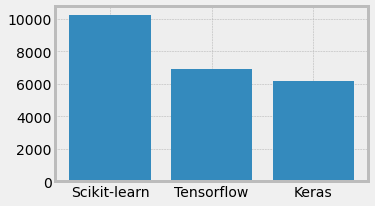

In [59]:
plt.subplots(figsize=(5,3))
plt.bar(libraries, frameworks.count())
plt.show()

In [60]:
# ConvertedComp oluşturuldu. Ortamala yıllık maaş oluşturuldu. 
split_salary = survey["Q24"].str.split("-",expand=True)
split_salary[0] = split_salary[0].str.replace("$","")
split_salary[0] = split_salary[0].str.replace(">","")
split_salary[1] = split_salary[1].str.replace("$","")
split_salary[0] = split_salary[0].str.replace(",","")
split_salary[1] = split_salary[1].str.replace(",","")
split_salary[0] = split_salary[0].fillna(0)
split_salary[1] = split_salary[1].fillna(0)

salary_array = np.arange(len(split_salary))
for i in range(len(split_salary)):
    if(split_salary[1][i] == 0):
        salary_array[i] = int(split_salary[0][i])
    else:
        salary_array[i] = int((int(split_salary[0][i]) + int(split_salary[1][i]))/2)

ConvertedComp = pd.DataFrame(salary_array, columns=["ConvertedComp"])
survey = pd.merge(survey, ConvertedComp, on = ConvertedComp.index)
survey.drop('key_0', axis='columns', inplace=True)

survey

,Age,Gender,Country,Education,Occupation,Coding_Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,0
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,17499
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137499
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,17499
19116,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0
19117,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499
19118,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,499


In [61]:
Ccomp = survey["ConvertedComp"]
occ = survey["Occupation"]
Ccompframe =  pd.DataFrame(Ccomp)
occframe =  pd.DataFrame(occ)
OccuCcomp = pd.concat([Ccompframe, occframe.reindex(Ccompframe.index)], axis=1)

#Ortalama yıllık maaşı en yüksek olan meslek bulundu ve sıralama tablosu verildi.
print("\n_______________________________________________________________\n")
Mean_salary = OccuCcomp.groupby(["Occupation"]).mean()
#Salary_df = pd.concat([Mean_salary, Mean_salary.reindex(Mean_salary.index)], axis=1)
Mean_salary.columns= ["Salary"]
SortedMax_salary = Mean_salary.sort_values("Salary", ascending=False)
print("Occupation with the highest average annual salary : ",  SortedMax_salary.index[0],"\n" )
print("Salary of the occupation with the highest average annual salary : ",  SortedMax_salary.iloc[0],"\n" )
print("_______________________________________________________________\n")
print("\n************************************************************\n")
# Data Scientist maaş sırası verilmişitir.
for i in range(len(SortedMax_salary)):
    if(SortedMax_salary.index[i] == "Data Scientist"):
        print("Rank in Data Scientists' salary table : ",(i+1))    
        
print("\n************************************************************\n")
SortedMax_salary



_______________________________________________________________

Occupation with the highest average annual salary :  Product/Project Manager 

Salary of the occupation with the highest average annual salary :  Salary    53634.717201
Name: Product/Project Manager, dtype: float64 

_______________________________________________________________


************************************************************

Rank in Data Scientists' salary table :  2

************************************************************



,Salary
Occupation,
Product/Project Manager,53634.717201
Data Scientist,49129.985709
Data Engineer,42900.194444
DBA/Database Engineer,41101.120000
Other,40992.594186
Research Scientist,39991.845758
Business Analyst,34082.477099
Machine Learning Engineer,32279.989720
Software Engineer,31888.920878


In [62]:
# Data Scientist olarak çalışanların ülke bazında ortalama yıllık maaşlarının büyükten küçüğe sıralanması, ilk 10 ülke ve bu ülkelerdeki ortalama yıllık Data Scientist maaşlarının listesi buldurulmuştur.
Data_Scientist = survey.loc[survey['Occupation'] == "Data Scientist"]
#Data_Scientist = group_ds.get_group("Data Scientist")
Ds_salary_bycountry = Data_Scientist.groupby(["Country", "Occupation"])["ConvertedComp"].mean()
Ds_salary_bycountry.sort_values(ascending=False).head(10).to_frame()

,,ConvertedComp
Country,Occupation,
United States of America,Data Scientist,133052.590206
Israel,Data Scientist,107672.153846
Switzerland,Data Scientist,94665.800000
Australia,Data Scientist,93886.625000
United Kingdom of Great Britain and Northern Ireland,Data Scientist,87345.017857
Thailand,Data Scientist,73707.416667
Canada,Data Scientist,71758.127273
United Arab Emirates,Data Scientist,70999.000000
Germany,Data Scientist,69964.890411


In [63]:
#250’den fazla kişi çalışan kurumdakilerin ortalama maaşı
NumOf_work = survey[["Q20","ConvertedComp"]]
NumOf_work["Q20"].unique()
NumOf_work=NumOf_work[(NumOf_work["Q20"]=="10,000 or more employees" )|(NumOf_work["Q20"]=="1000-9,999 employees") |(NumOf_work["Q20"]=="250-999 employees" )]
NumOf_work.mean()       


ConvertedComp    53663.344135
dtype: float64

In [64]:
# ConvertedComp sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturuldu ve listelendi.
Country__ = survey["Country"]
Mean__ = survey.groupby(["Country"])["ConvertedComp"].mean()
Median__ = survey.groupby(["Country"])["ConvertedComp"].median()
Std__ = survey.groupby(["Country"])["ConvertedComp"].std()
Country_data = {'Mean(Ortalama)': Mean__,'Median(Ortanca)': Median__,'Std(Standart Sapma)': Std__}
ConvertedComp_for_Country = pd.DataFrame(data=Country_data)
ConvertedComp_for_Country


,Mean(Ortalama),Median(Ortanca),Std(Standart Sapma)
Country,,,
Argentina,11376.284615,999,28352.051915
Australia,57881.636771,44999,70463.634891
Bangladesh,1516.205882,0,4581.971376
Belarus,9579.490566,2499,15566.183233
Belgium,35770.610169,1499,75451.956908
...,...,...,...
Ukraine,12318.590361,1999,19230.743559
United Arab Emirates,51033.706897,17499,57332.093389
United Kingdom of Great Britain and Northern Ireland,60355.979079,44999,76054.116252


In [69]:
# Türkiye sıralama ve değerleri
for i in range(len(ConvertedComp_for_Country)):
    if(ConvertedComp_for_Country.index[i] == "Turkey"):
        print("___________________________________________________________\n")
        print("                   Turkey Rank is :",i,)
        print("___________________________________________________________")
        Table_Turkey = ConvertedComp_for_Country.iloc[i].to_frame()

Table_Turkey

___________________________________________________________

                   Turkey Rank is : 49
___________________________________________________________


,Turkey
Mean(Ortalama),8605.077640
Median(Ortanca),499.000000
Std(Standart Sapma),32446.575205


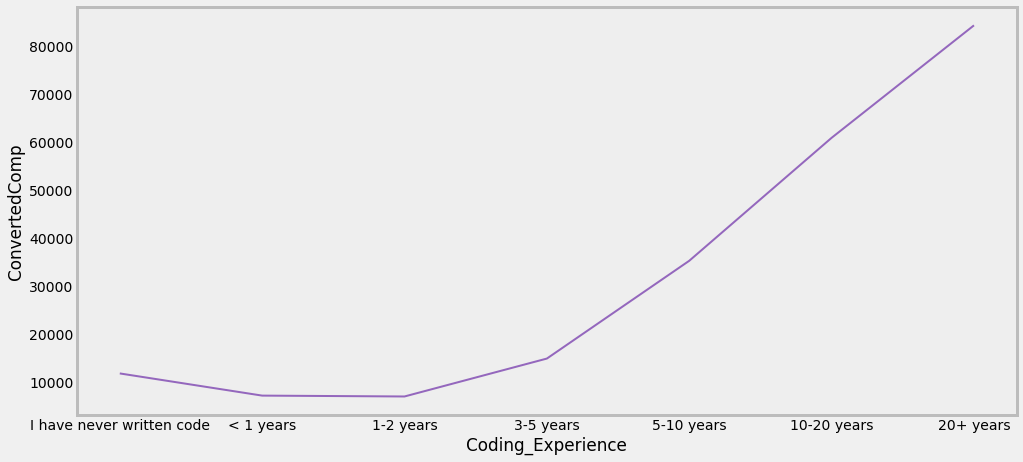

In [70]:
Bachelors_Degree = survey.loc[survey['Education'] == "Bachelor’s degree"]
Masters_Degree = survey.loc[survey['Education'] == "Master's Degree"]
Doctoral_Degree = survey.loc[survey['Education'] == "Doctoral degree"]
Degrees = [Bachelors_Degree, Masters_Degree,Doctoral_Degree]
Degrees_frame = pd.concat(Degrees)
Degrees_frame=Degrees_frame.groupby("Coding_Experience").mean()
Degrees_frame = Degrees_frame.reindex( ["I have never written code", "< 1 years", "1-2 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"])
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(Degrees_frame.index, Degrees_frame.values, "tab:purple")
ax.set(xlabel='Coding_Experience', ylabel='ConvertedComp')
ax.grid()
plt.show()

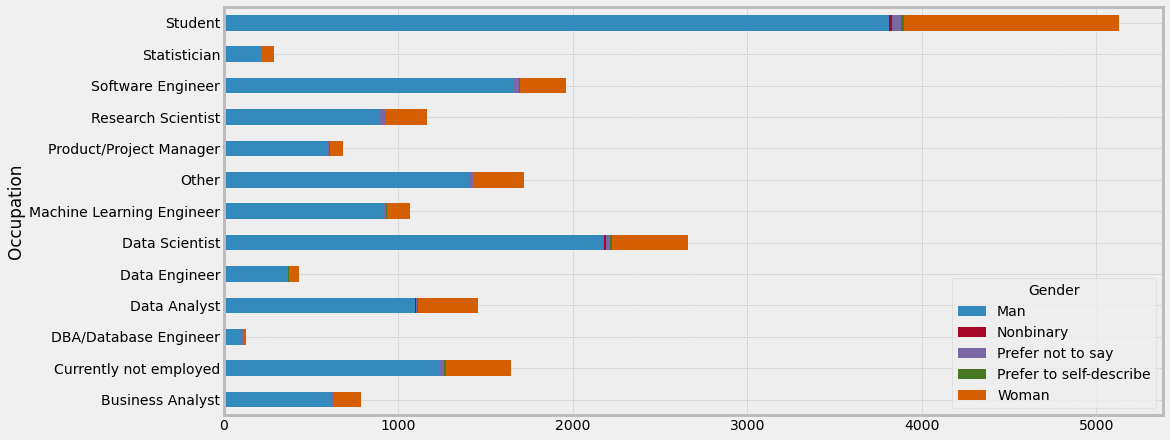

In [71]:
# Mesleklerdeki Occupation-cinsiyet dağılımı, yatay yığılmış \"stacked\" sütun grafiği Occupation ve Gender'a göre iki farklı şekilde gösterildi.

gender_occ = survey.groupby(['Occupation', 'Gender'])['Occupation'].count().unstack('Gender').fillna(0)
ax_gender_occ = gender_occ.plot.barh(figsize=(15,7),stacked=True)


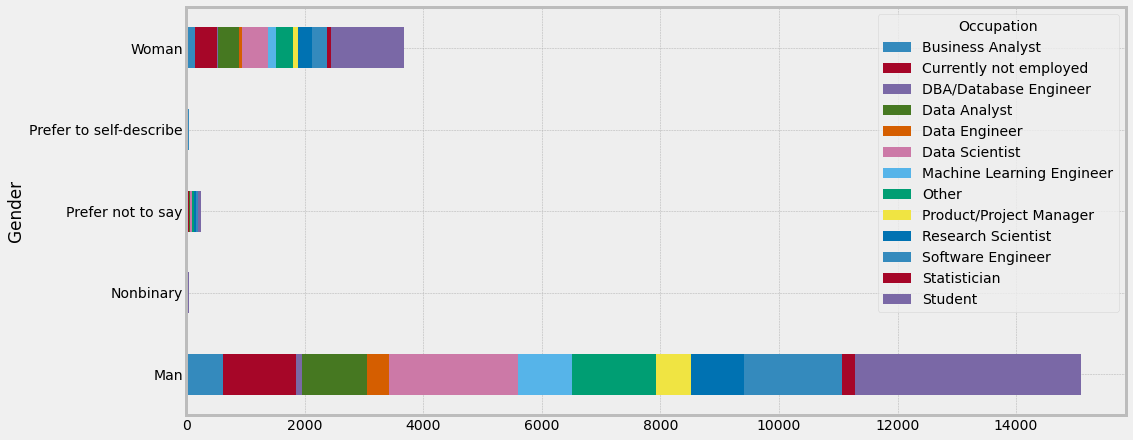

In [72]:
gender_occ2 = survey.groupby(['Gender', 'Occupation'])['Gender'].count().unstack('Occupation').fillna(0)
ax_gender_occ2 = gender_occ2.plot.barh(figsize=(15,7),stacked=True)

In [73]:
# Her meslek (```Occupation```) için kadın oranını bulunup büyükten küçüğe sıralanması
gender_occ_transpose = gender_occ.T
Gender_occ_df = pd.DataFrame(gender_occ_transpose, columns=survey.Occupation.unique())
print("Ratio of female employees to all employees by occupation :")
Women_percentage = (Gender_occ_df.tail(1).sum()/Gender_occ_df.sum())*100
Women_percentage.sort_values(ascending=False)
Women_percentage_frame = pd.DataFrame(Women_percentage.sort_values(ascending=False),columns=["Percentage"])
Women_percentage_frame

Ratio of female employees to all employees by occupation :


,Percentage
Student,24.029647
Statistician,23.693380
Data Analyst,23.541524
Currently not employed,22.674772
Research Scientist,20.308483
Business Analyst,19.338422
Other,16.802326
Data Scientist,16.434750
Data Engineer,13.888889
Software Engineer,13.272078


In [74]:
# Şu anda çalışmayan kadın ve erkek oranlarının listesi
gender_occ.Woman.sum()
cme_woman = ((gender_occ.Woman["Currently not employed"]/gender_occ_transpose["Currently not employed"].sum())*100)
cme_man = ((gender_occ.Man["Currently not employed"]/gender_occ_transpose["Currently not employed"].sum())*100)
cme_data = [{'Woman' : cme_woman,'Man' : cme_man}]
Cme_gender = pd.DataFrame(cme_data,index=["Currently not employed Percentage"])
Cme_gender

,Woman,Man
Currently not employed Percentage,22.674772,74.832827


In [75]:
split_Coding_Experience = survey["Coding_Experience"]
split_Coding_Experience = split_Coding_Experience.str.replace(" years","")
split_Coding_Experience = split_Coding_Experience.str.replace("< ","0-")
split_Coding_Experience = split_Coding_Experience.str.replace("+","")
split_Coding_Experience = split_Coding_Experience.str.replace("I have never written code","0")
split_Coding_Experience_df = split_Coding_Experience.str.split("-",expand=True)
split_Coding_Experience_df[0] = split_Coding_Experience_df[0].fillna(0)
split_Coding_Experience_df[1] = split_Coding_Experience_df[1].fillna(0)

Experience_array = np.arange(len(split_Coding_Experience))
for i in range(len(split_Coding_Experience_df)):
    if(split_Coding_Experience_df[1][i] == 0):
        Experience_array[i] = int(split_Coding_Experience_df[0][i])
    else:
        Experience_array[i] = int((int(split_Coding_Experience_df[0][i]) + int(split_Coding_Experience_df[1][i]))/2)

ExperienceAverage = pd.DataFrame(Experience_array, columns=["ExperienceAverage"])

survey_withexperience = pd.merge(survey, ExperienceAverage, on = ExperienceAverage.index)
survey_withexperience.drop('key_0', axis='columns', inplace=True)

heigherthanthree = survey_withexperience[(survey_withexperience["Gender"]=="Woman") & (survey_withexperience["ExperienceAverage"] > 3)]
heigherthanthree=survey_withexperience.groupby("Country").size().to_frame().sort_values(0,ascending = False)
heigherthanthree.iloc[0].to_frame()

,India
0,5596


In [77]:
# 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri silindi.
Q39__ = survey.filter(regex="^Q39", axis=1)
reg = r"\(.*\)".format("|".join(Q39__))
survey.loc[:,['Q39' in i for i in survey.columns]] = survey.loc[:,['Q39' in i for i in survey.columns]].replace(reg, '', regex=True)
survey.loc[:,['Q39' in i for i in survey.columns]]
survey.filter(regex=r"^Q39", axis=1)

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19115,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
19116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [78]:
# 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu
frame18_21 = survey.loc[survey['Age'] == "18-21"]
col__ =  survey.loc[:,survey.columns.str.startswith('Q39')].columns
social_media = np.array(["Twitter","Email newsletters","Reddit","Kaggle","Course Forums","YouTube","Podcasts","Blogs","Journal Publications","Slack Communities ","None","Other"])
frame18_21=frame18_21.rename(columns={'Q39_Part_1':social_media[0],'Q39_Part_2':social_media[1],'Q39_Part_3':social_media[2],'Q39_Part_4':social_media[3],
                           'Q39_Part_5':social_media[4],'Q39_Part_6':social_media[5],'Q39_Part_7':social_media[6],'Q39_Part_8':social_media[7],
                           'Q39_Part_9':social_media[8],'Q39_Part_10':social_media[9],'Q39_Part_11':social_media[10],
                            'Q39_OTHER':social_media[11]})

socialmedia_array = np.arange(len(social_media))

for i in range(len(social_media)):
    socialmedia_array[i] = frame18_21[social_media[i]].value_counts()
    
socialmedia_df = pd.DataFrame(social_media)
socialmedia_array_df =  pd.DataFrame(socialmedia_array)
frame18_21_Social = pd.merge(socialmedia_df, socialmedia_array_df, on = socialmedia_array_df.index)
frame18_21_Social.drop('key_0', axis='columns', inplace=True)
frame18_21_Social = frame18_21_Social.rename(columns={'0_x':"Social Media",'0_y':"User Counts"})
frame18_21_Social.sort_values(by="User Counts", ascending=False).head(1)
#Favori sosyal medya tablosunun zirvesinde Kaggle bulunmaktadır.

,Social Media,User Counts
3,Kaggle,1062


In [79]:
# max() fonksiyonu farklı bir değer döndürdüğü için bunu da göstermek ve hatanın tabloyla alakalı olmadığını göstermek istedim.
frame18_21_Social.max()

Social Media    YouTube
User Counts        1062
dtype: object

In [80]:
_country_info__ = pd.read_csv('https://download.geonames.org/export/dump/countryInfo.txt',skiprows=49,sep='\t')
_country_info__ = _country_info__[["#ISO","Country","neighbours"]]
_country_info__ = _country_info__.set_index("Country")

_country_info__ = _country_info__.rename(columns={"#ISO" : "Country Code"})
_country_info__

merged_survey =  _country_info__.merge(survey, left_on="Country", right_on ="Country")
merged_survey


,Country,Country Code,neighbours,Age,Gender,Education,Occupation,Coding_Experience,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp
0,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Research Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84999
1,United Arab Emirates,AE,"SA,OM",40-44,Man,Professional degree,Other,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12499
2,United Arab Emirates,AE,"SA,OM",30-34,Man,Doctoral degree,Product/Project Manager,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54999
3,United Arab Emirates,AE,"SA,OM",25-29,Man,Bachelor’s degree,Other,< 1 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499
4,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Software Engineer,< 1 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,Polyaxon,Trains,NaN,NaN,NaN,64999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",22-24,Man,No formal education past high school,Student,< 1 years,Python,R,...,NaN,NaN,NaN,Guild.ai,Polyaxon,Trains,NaN,NaN,NaN,0
14789,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",18-21,Man,Bachelor’s degree,Student,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0
14790,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",18-21,Man,Master’s degree,Data Scientist,3-5 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64999
14791,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",70+,Man,Some college/university study without earning ...,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499


In [81]:
DE_survey_n = merged_survey[merged_survey['neighbours'].str.contains("DE", na=False)]
DE_survey = merged_survey[merged_survey['Country Code'].str.contains("DE", na=False)]
frames = [DE_survey, DE_survey_n]
DE_survey = pd.concat(frames)
Educationfor_DE = DE_survey[DE_survey["Education"]=="Doctoral degree"]
Doctoratefor_survey = merged_survey[merged_survey["Education"]=="Doctoral degree"]

one2one = (Educationfor_DE.groupby(["Country"])["Education"].count()/DE_survey.groupby(["Country"])["Education"].count())*100

allofthem = (Educationfor_DE.groupby(["Country"])["Education"].count()/merged_survey.groupby(["Country"])["Education"].count().sum())*100


In [82]:
# Almanya ve komşu ülkelerinin Doktoralılarının, tüm ülkelerin tüm eğitim seviyelerine oranın yüzdesi
one2one.to_frame().rename(columns = {"Education":"Percentage"})

,Percentage
Country,
Belgium,22.033898
France,23.961661
Germany,25.848564
Netherlands,15.436242
Poland,15.172414
Switzerland,32.352941


In [83]:
# Almanya ve komşu ülkelerinin Doktoralılarının, Almnaya ve komşu ülkelerinin tüm eğitim seviyelerine oranı yüzdesi
allofthem.to_frame().rename(columns = {"Education":"Percentage"})

,Percentage
Country,
Belgium,0.087879
France,0.506997
Germany,0.669235
Netherlands,0.155479
Poland,0.148719
Switzerland,0.148719
